# Project of Fundamentals of Artificial Intelligence and Knowledge Representation year 2022/2023

Made by Riccardo Murgia and Alessio Pellegrino
data source: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link?resource=download

# Imports

In [1]:
import seaborn as sns
import random

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from pgmpy.estimators import HillClimbSearch

import os

from function_definition import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 42

# Data import and visualization


In [2]:
data = pd.read_csv('./dataset/cancer patient data sets.csv', index_col='index')
data.drop('Patient Id', axis=1, inplace=True)
target = 'Level'

data[target] = OrdinalEncoder(categories=[['Low', 'Medium', 'High']]).fit_transform(data[['Level']])
data.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0.0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1.0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2.0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2.0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2.0


## Analyzing the data


In [3]:
data.describe()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


## Checking for NaN values


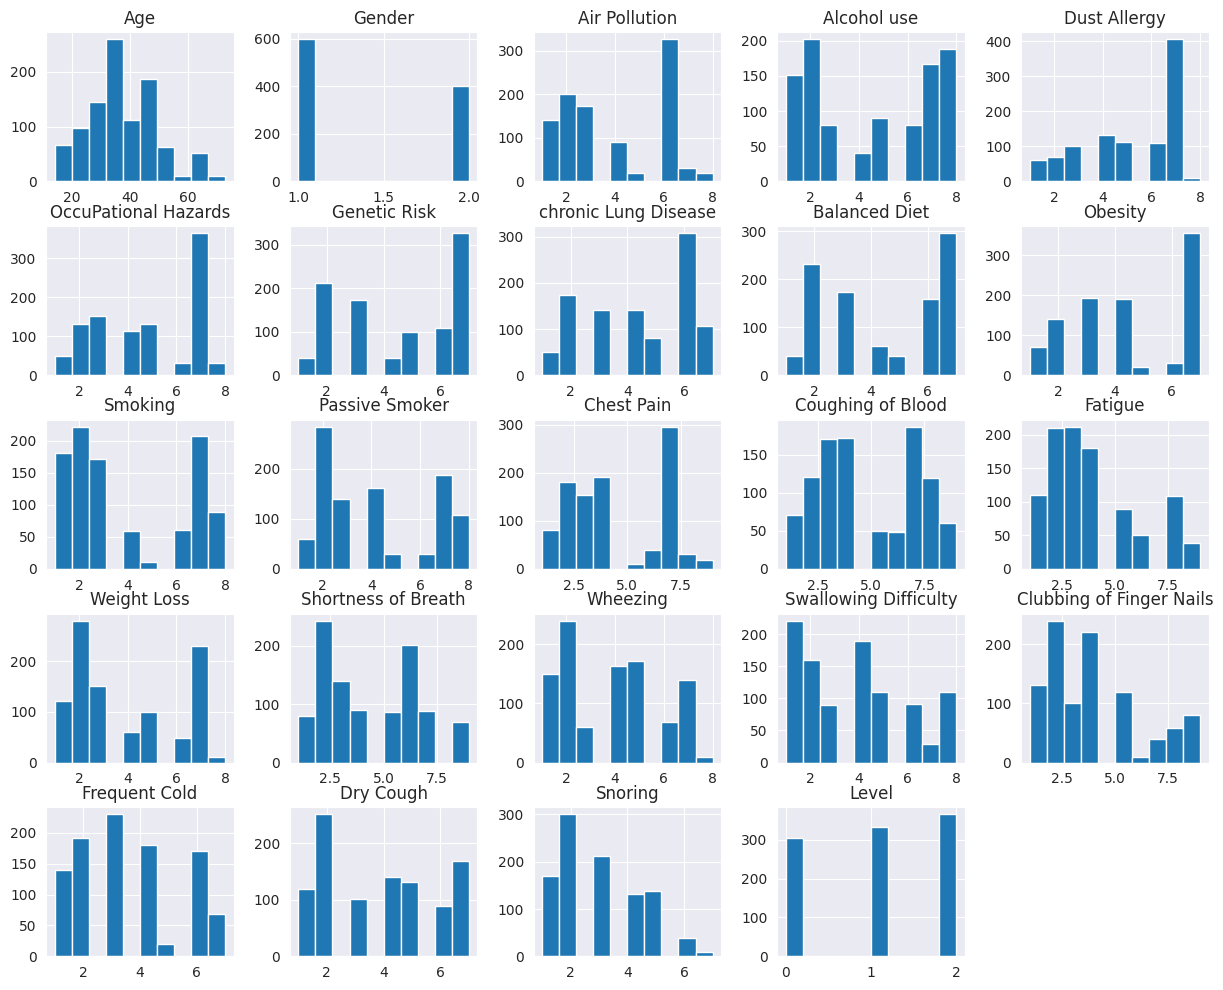

In [4]:
data.hist(figsize=(15,12));


## Let's discretize the values of the age attribute

Below we can see the new categories and the associated meaning:
* 0: Child
* 1: Young adult
* 2: Adult
* 3: Senior

In [5]:
columns = ['Age']
bins_edges = {'Age':[0, 18, 30, 60, 100]}
categories = {'Age':[0, 1, 2, 3]}
data = discretize(data, columns, bins_edges, categories=categories)


## Let’s take a look to the correlation of the data


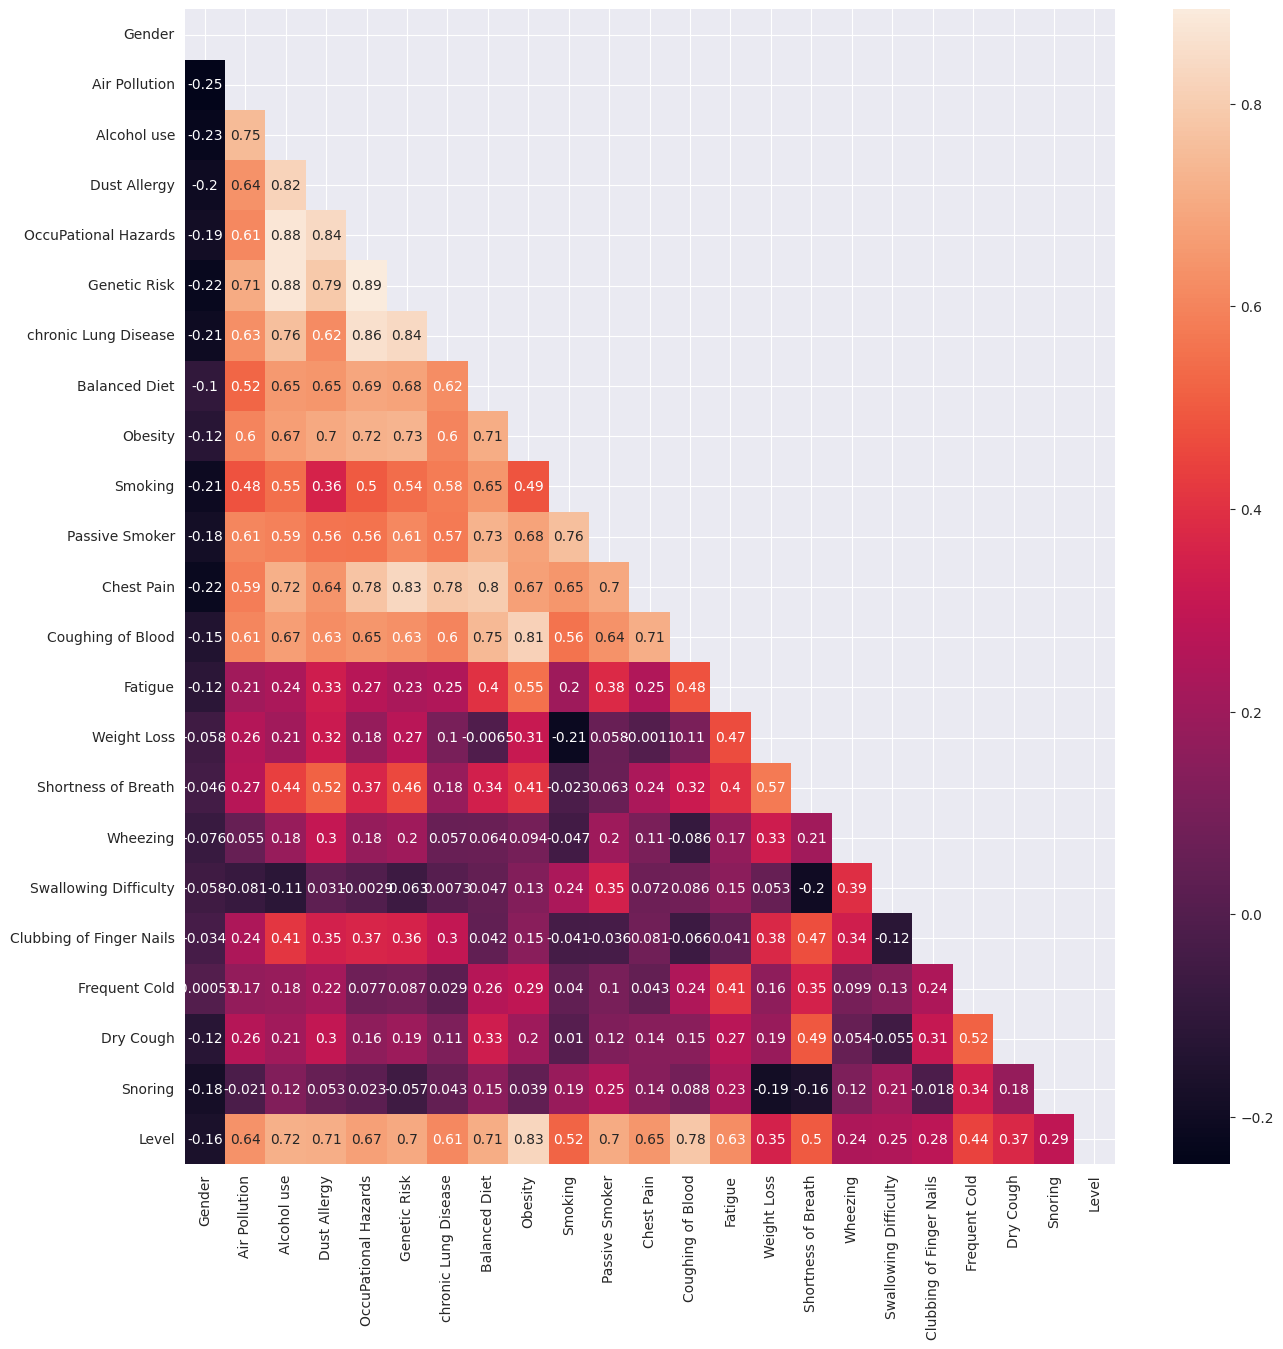

In [6]:
plt.figure(figsize=(15,15))
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True, mask=mask);


# Classification Experiments


#### Let's prepare the data

In [7]:
data.columns = [node.replace(" ", "\n").lower() for node in data.columns.values]
target = target.lower()

data_train, data_test = train_test_split(data, random_state=random_state, train_size=0.80)
data_test.reset_index(drop=True, inplace=True)
data_train.reset_index(drop=True, inplace=True)

X_train, y_train = data_train.drop(target, axis=1), data_train[target].values.tolist()
X_test, y_test = data_test.drop(target, axis=1), data_test[target].values.tolist()


## Let's define our models

### First net

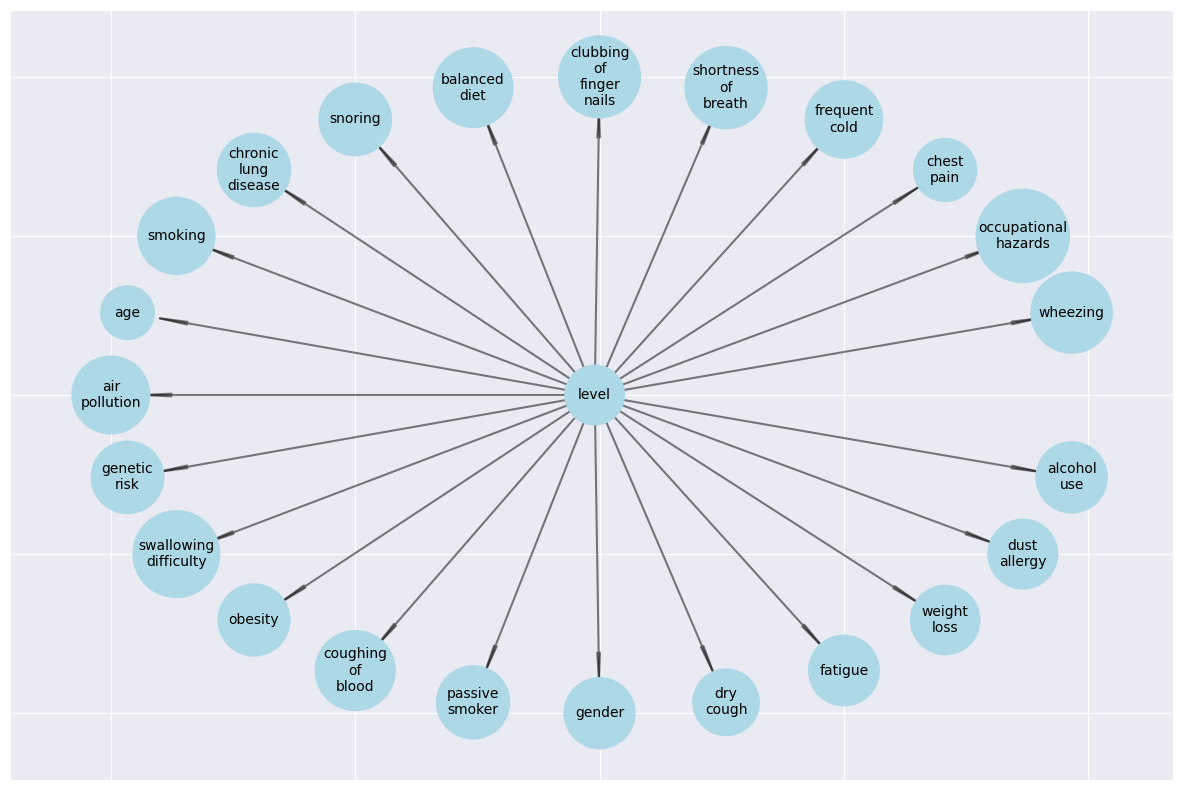

In [8]:
nb_model = NaiveBayes(feature_vars=data.columns.values[data.columns.values != target], dependent_var=target)
draw_net(data.columns.values, nb_model, style='circular', target='level')


### Second net

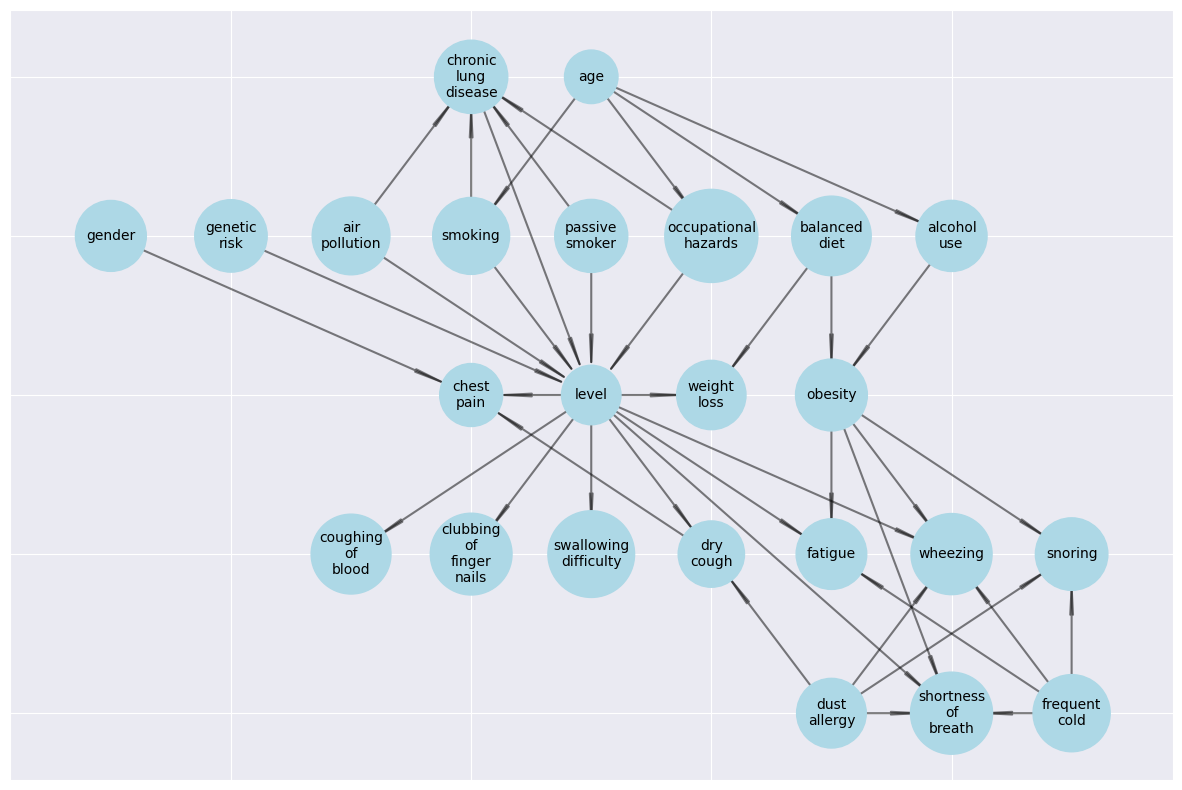

In [9]:
full_nodes_set = [
    'Chronic lung disease', 'Age', 'Gender', 'Genetic risk', 'Air pollution', 'Smoking', 'Passive smoker', 'Occupational Hazards', 'Balanced diet',
    'Alcohol use', 'Chest pain', 'Level', 'Weight loss', 'Obesity', 'Coughing of blood', 'Clubbing of finger nails', 'Swallowing difficulty',
    'Dry cough', 'Fatigue', 'Wheezing', 'Snoring', 'Dust allergy', 'Shortness of breath', 'Frequent cold'
    ]

full_nodes_set = [node.replace(" ", "\n").lower() for node in full_nodes_set]

arcs_full_net = [
    ('age', 'smoking'), ('age', 'occupational hazards'), ('age', 'balanced diet'), ('age', 'alcohol use'),
    ('air pollution', 'level'),  ('chronic lung disease', 'level'), ('smoking', 'level'), ('passive smoker', 'level'), ('occupational hazards', 'level'),
    ('genetic risk', 'level'),
    ('level', 'chest pain'), ('level', 'dry cough'), ('level', 'clubbing of finger nails'), ('level', 'coughing of blood'), ('level', 'swallowing difficulty'),
    ('level', 'fatigue'), ('level', 'wheezing'), ('level', 'shortness of breath'), ('level', 'weight loss'),
    ('air pollution', 'chronic lung disease'), ('smoking', 'chronic lung disease'), ('passive smoker', 'chronic lung disease'),
    ('occupational hazards', 'chronic lung disease'),
    ('balanced diet', 'weight loss'), ('balanced diet', 'obesity'),
    ('alcohol use' , 'obesity'),
    ('gender', 'chest pain' ), ('dry cough', 'chest pain'),
    ('obesity', 'fatigue'), ('obesity', 'wheezing'), ('obesity', 'shortness of breath'), ('obesity', 'snoring'),
    ('dust allergy', 'dry cough'), ('dust allergy', 'wheezing'), ('dust allergy', 'snoring'), ('dust allergy', 'shortness of breath'),
    ('frequent cold', 'wheezing'), ('frequent cold', 'snoring'), ('frequent cold', 'shortness of breath'), ('frequent cold', 'fatigue')
    ]

arcs_full_net = [(t[0].replace(" ", "\n"), t[1].replace(" ", "\n")) for t in arcs_full_net]

full_bn_model = BayesianNetwork(arcs_full_net)
draw_net(full_nodes_set, full_bn_model)

### Third net

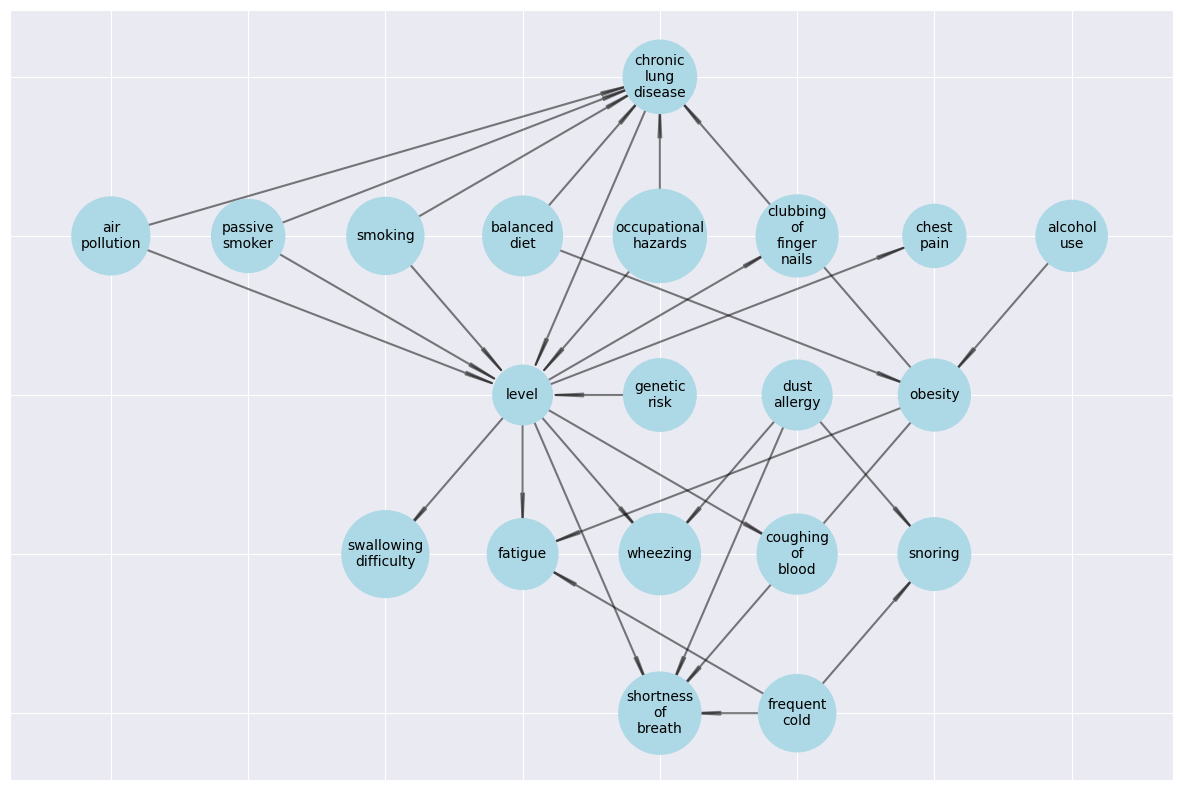

In [10]:
trimmed_nodes = [
    'chronic lung disease',  'air pollution', 'passive smoker', 'smoking',
    'balanced diet', 'occupational hazards', 'clubbing of finger nails', 'chest pain', 'alcohol use', 'level', 'genetic risk', 'dust allergy', 'obesity', 'swallowing difficulty',
    'fatigue', 'wheezing', 'coughing of blood', 'snoring','shortness of breath','frequent cold'
    ]

trimmed_nodes = [node.replace(" ", "\n") for node in trimmed_nodes]

arcs_trimmed_net = [
    ('air pollution', 'level'),  ('chronic lung disease', 'level'), ('smoking', 'level'), ('passive smoker', 'level'), ('occupational hazards', 'level'),
    ('genetic risk', 'level'),
    ('level', 'clubbing of finger nails'), ('level', 'chest pain'), ('level', 'coughing of blood'), ('level', 'swallowing difficulty'), ('level', 'fatigue'),
    ('level', 'wheezing'), ('level', 'shortness of breath'),
    ('air pollution', 'chronic lung disease'), ('smoking', 'chronic lung disease'), ('passive smoker', 'chronic lung disease'),
    ('occupational hazards', 'chronic lung disease'), ('balanced diet', 'chronic lung disease'), ('obesity', 'chronic lung disease'),
    ('balanced diet', 'obesity'), ('alcohol use' , 'obesity'),
    ('obesity', 'fatigue'), ('obesity', 'shortness of breath'),
    ('dust allergy', 'wheezing'), ('dust allergy', 'snoring'), ('dust allergy', 'shortness of breath'),
    ('frequent cold', 'snoring'), ('frequent cold', 'shortness of breath'), ('frequent cold', 'fatigue')
    ]


arcs_trimmed_net = [(t[0].replace(" ", "\n"), t[1].replace(" ", "\n")) for t in arcs_trimmed_net]

trimmed_bn_model = BayesianNetwork(arcs_trimmed_net)
draw_net(trimmed_nodes, trimmed_bn_model, style='trimmed')


### Fourth network

  0%|          | 0/1000000 [00:00<?, ?it/s]

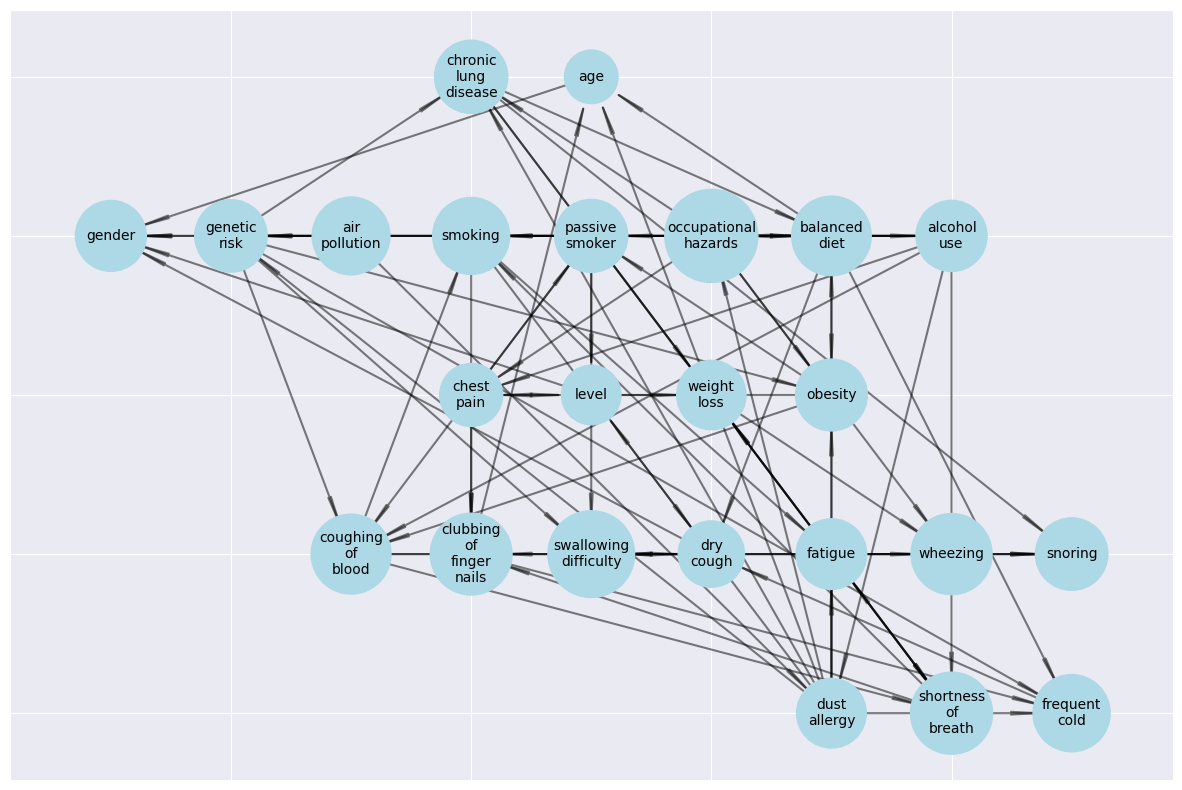

In [11]:
auto_bn_model = BayesianNetwork(HillClimbSearch(data=data_train).estimate())
draw_net(full_nodes_set, auto_bn_model)


## Let's fit our models

In [12]:
my_fit(nb_model, data_train)
my_fit(full_bn_model, data_train)
my_fit(trimmed_bn_model, data_train[trimmed_nodes])
my_fit(auto_bn_model, data_train)


## Check the consistency of the models

In [13]:
models_to_check = {'Naive Net': nb_model, 'Full net': full_bn_model, 'Trimmed net': trimmed_bn_model, 'Auto net':auto_bn_model}
check_consistency(models_to_check)


Naive Net consistency check successfully completed
Full net consistency check successfully completed
Trimmed net consistency check successfully completed
Auto net consistency check successfully completed


## Let's see our model outcomes

In [15]:
#y_predicted_nb = classify(nb_model, X_test)
#report = metrics.classification_report(y_test, y_predicted_nb)             fixme
#print(report)

In [14]:
y_predicted_full = classify(full_bn_model, X_test)
report = metrics.classification_report(y_test, y_predicted_full)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [15]:
trimmed_nodes_X = trimmed_nodes.copy()
trimmed_nodes_X.remove(target)
y_predicted_trimmed = classify(trimmed_bn_model, X_test[trimmed_nodes_X])
report = metrics.classification_report(y_test, y_predicted_trimmed)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [16]:
y_predicted_auto = classify(auto_bn_model, X_test)
report = metrics.classification_report(y_test, y_predicted_auto)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# analizziamo le probabiliy table ottenute dal nostro modello

In [17]:
n_sample_test = len(y_test)
random_element_index = random.randrange(n_sample_test)
element_to_test = X_test.loc[random_element_index].to_frame().T


#nb_model.predict_probability(element_to_test)
full_bn_model.predict_probability(element_to_test)
trimmed_bn_model.predict_probability(element_to_test[trimmed_nodes_X])
auto_bn_model.predict_probability(element_to_test)
#TODO creare un cazzo di dataframe che contine le prob di ottenute con ogni model

,level_0.0,level_1.0,level_2.0
156,0.001316,0.001316,0.997368


# Query experiment

In [18]:
full_bn_inference = VariableElimination(full_bn_model)
trimmed_bn_inference  = VariableElimination(trimmed_bn_model)
auto_bn_inference = VariableElimination(auto_bn_model)


In [19]:
evidences = [{'air\npollution':6}, {'passive\nsmoker':6}, {'smoking':6}, {'chronic\nlung\ndisease':6}, {'occupational\nhazards':6}, {'genetic\nrisk':6}]
query = ['level']
results_full = []
results_trimmed = []
results_auto = []

for ev in evidences:
    full = full_bn_inference.query(query, evidence=ev)
    trimmed = trimmed_bn_inference.query(query, evidence=ev)
    auto = auto_bn_inference.query(query, evidence=ev)
    result_full = {'evidence' : list(ev.keys())[0]}
    result_trimmed = {'evidence' : list(ev.keys())[0]}
    result_auto = {'evidence' : list(ev.keys())[0]}
    for q_r in [0, 1, 2]:
        result_full[q_r + 1] = full.values[q_r]
        result_trimmed[q_r + 1] = trimmed.values[q_r]
        result_auto[q_r + 1] = auto.values[q_r]
    results_full.append(result_full)
    results_trimmed.append(result_trimmed)
    results_auto.append(result_auto)

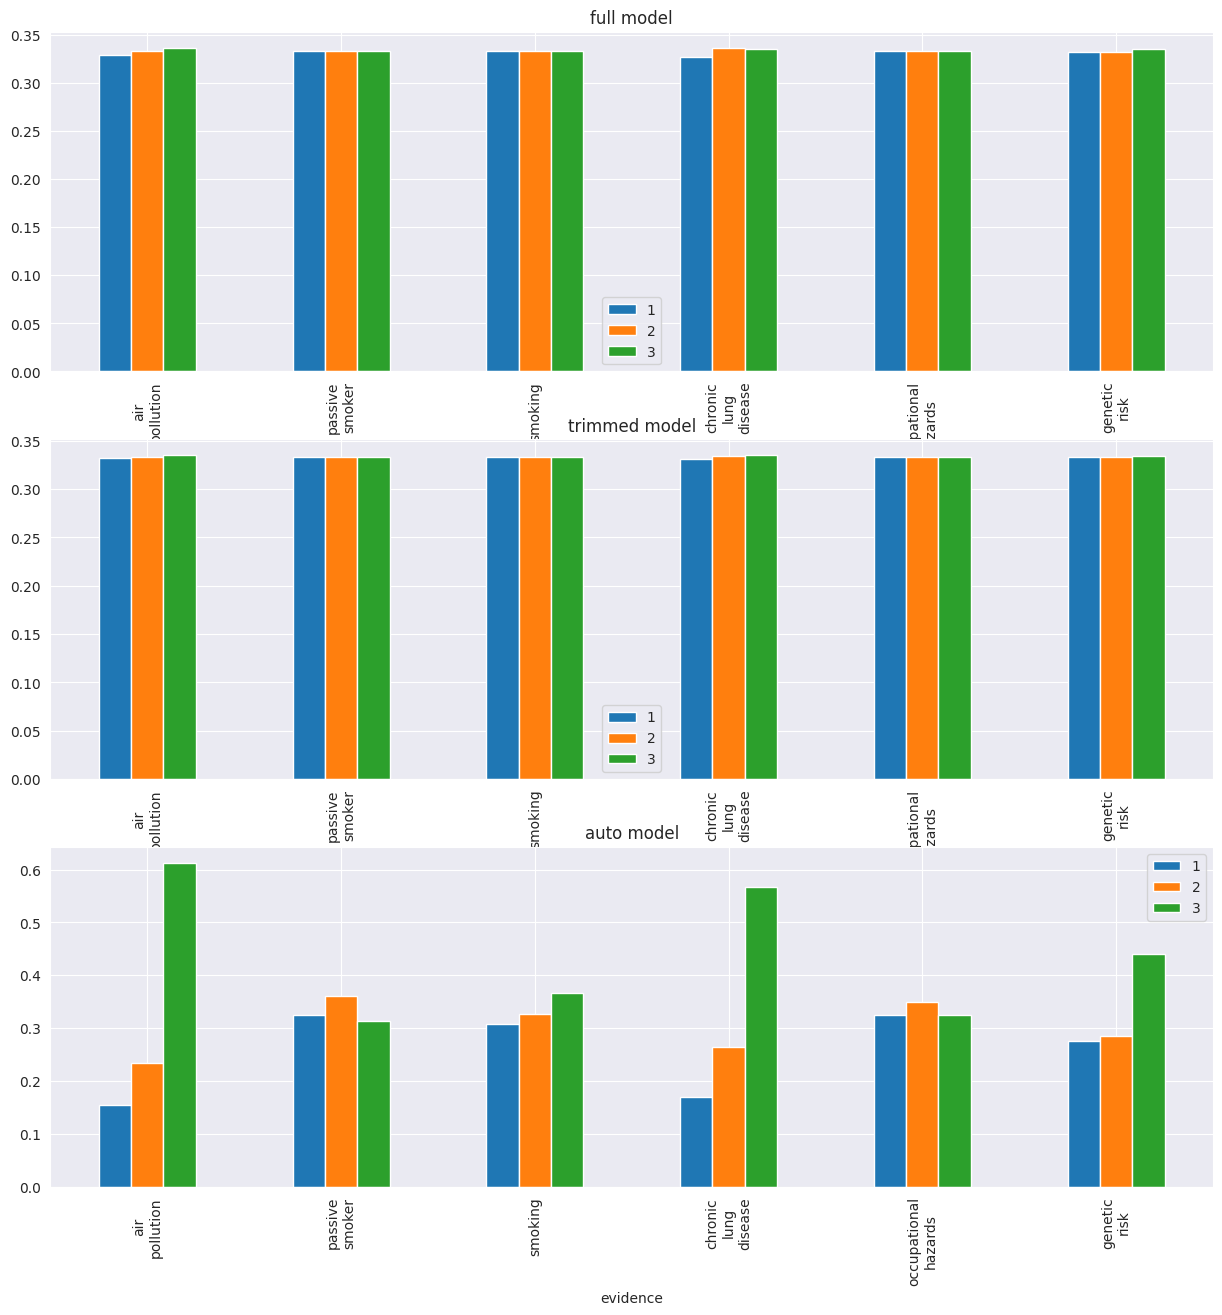

In [20]:
multi_bar_plot([results_full, results_trimmed, results_auto], ['full model', 'trimmed model', 'auto model'], 'evidence')


# Second query

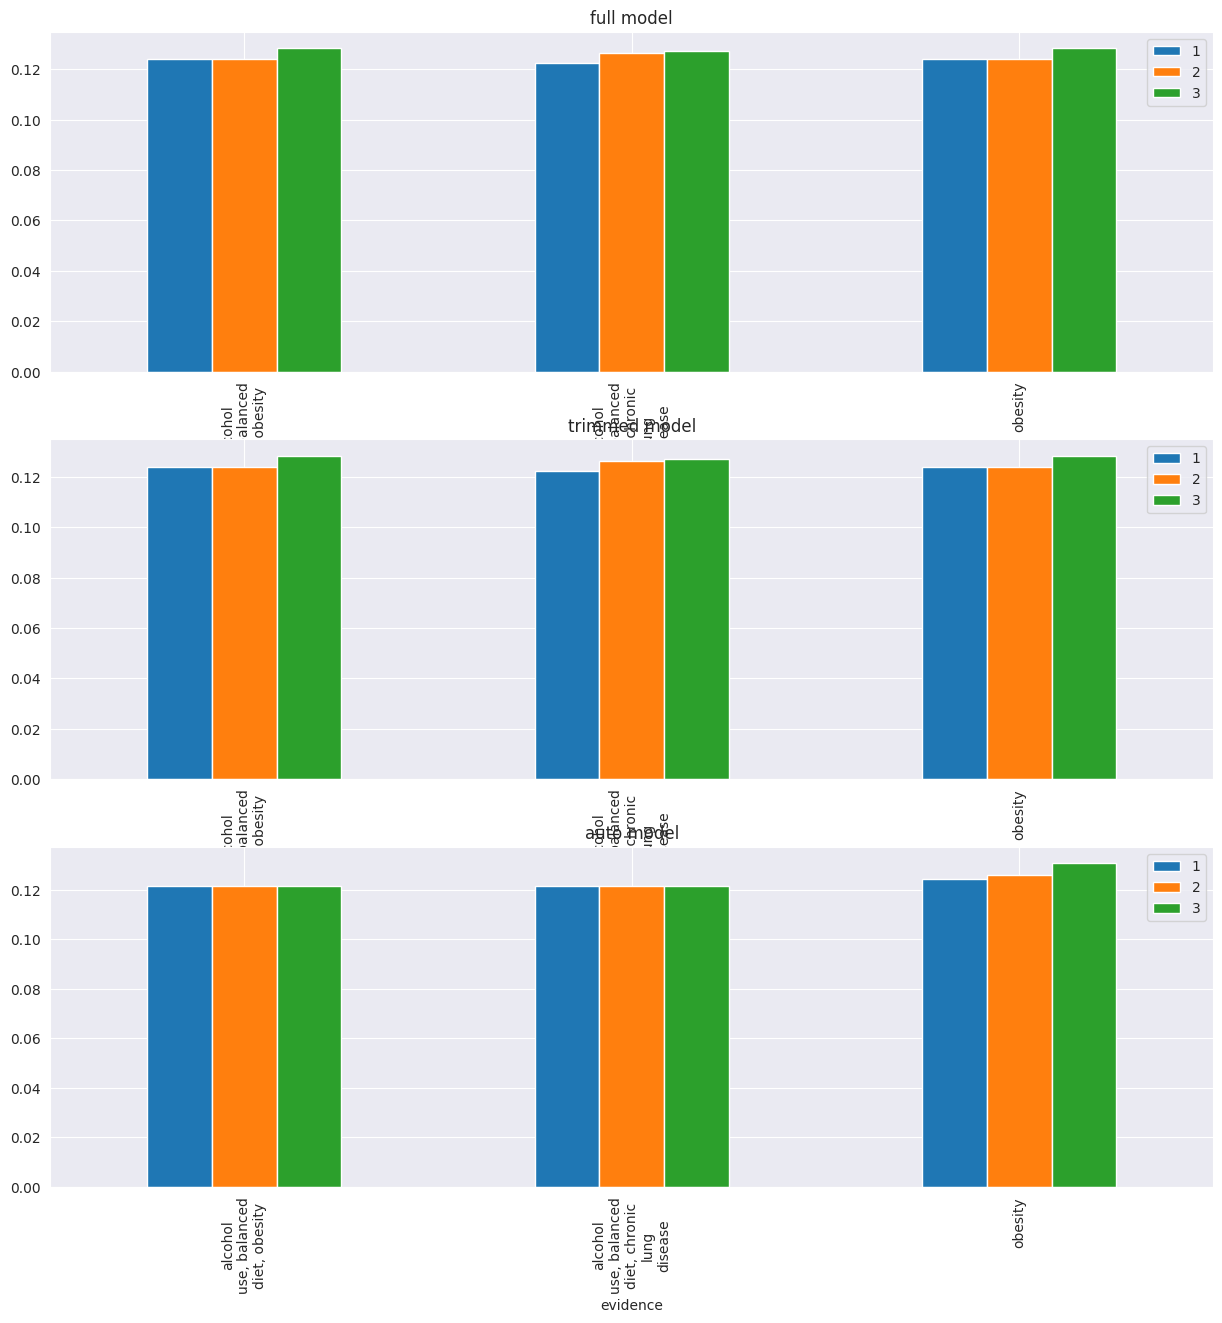

In [21]:
evidences = [{'alcohol\nuse':6, 'balanced\ndiet': 5, 'obesity': 5}, {'alcohol\nuse':6, 'balanced\ndiet': 5, 'chronic\nlung\ndisease': 5}, {'obesity': 5}]
query = ['shortness\nof\nbreath']
results_breath_full = []
results_breath_trimmed = []
results_breath_auto = []
for ev in evidences:
    full = full_bn_inference.query(query, evidence=ev)
    trimmed = trimmed_bn_inference.query(query, evidence=ev)
    auto = auto_bn_inference.query(query, evidence=ev)
    result_full = {'evidence' : ', '.join(list(ev.keys()))}
    result_trimmed = {'evidence' : ', '.join(list(ev.keys()))}
    result_auto = {'evidence' : ', '.join(list(ev.keys()))}
    for q_r in [0,1,2]:
        result_full[q_r + 1] = full.values[q_r]
        result_trimmed[q_r + 1] = trimmed.values[q_r]
        result_auto[q_r + 1] = auto.values[q_r]
    results_breath_full.append(result_full)
    results_breath_trimmed.append(result_trimmed)
    results_breath_auto.append(result_auto)

multi_bar_plot([results_breath_full, results_breath_trimmed, results_breath_auto], ['full model', 'trimmed model', 'auto model'], 'evidence')


### Markov blanket Test

In [22]:
mb_full_bn = full_bn_model.get_markov_blanket('level')
mb_trimmed_bn = trimmed_bn_model.get_markov_blanket('level')
mb_auto_bn = auto_bn_model.get_markov_blanket('level')

mb_full_bn_and_level = mb_full_bn + ['level']
mb_trimmed_and_bn_level = mb_trimmed_bn + ['level']
mb_auto_bn_ans_level = mb_auto_bn + ['level']


def trim(dfs, trimmer, df_names, names):
        res = {}
        for df, idx in zip(dfs, names):
            for col, col_name in zip(trimmer, df_names):
                if not col_name in res:
                    res[col_name] = [f'{df[col].drop_duplicates().shape}']
                else:
                    res[col_name].append(f'{df[col].drop_duplicates().shape}')
            if not 'idx' in res:
                res['idx'] = [idx]
            else:
                res['idx'].append(idx)
        return_df = pd.DataFrame(res)
        return_df.set_index('idx', inplace=True)
        return return_df


trim([data_train, data_test], [mb_full_bn, mb_full_bn_and_level], ['Markov Blanket','Markov Blacket + level'], ['train', 'test']).head(2)


,Markov Blanket,Markov Blacket + level
idx,,
train,"(81, 20)","(81, 21)"
test,"(60, 20)","(60, 21)"


In [23]:
trim([data_train, data_test], [mb_trimmed_bn, mb_trimmed_and_bn_level], ['Markov Blanket','Markov Blacket + level'], ['train', 'test']).head(2)

,Markov Blanket,Markov Blacket + level
idx,,
train,"(53, 16)","(53, 17)"
test,"(45, 16)","(45, 17)"


In [24]:
trim([data_train, data_test], [mb_auto_bn, mb_auto_bn_ans_level], ['Markov Blanket','Markov Blacket + level'], ['train', 'test']).head(2)


,Markov Blanket,Markov Blacket + level
idx,,
train,"(104, 12)","(104, 13)"
test,"(70, 12)","(70, 13)"


# dataframe droppando per mbs

In [30]:
df_train_full = data_train.iloc[data_train[mb_full_bn].drop_duplicates().index]                  #fixme
df_train_trimmed = data_train.iloc[data_train[mb_trimmed_bn].drop_duplicates().index]
df_train_auto = data_train.iloc[data_train[mb_auto_bn].drop_duplicates().index]

full_bn_model_copy = BayesianNetwork(arcs_full_net)
trimmed_bn_model_copy = BayesianNetwork(arcs_trimmed_net)
auto_bn_model_copy = BayesianNetwork(HillClimbSearch(data=data_train).estimate())

my_fit(full_bn_model_copy, df_train_full)
my_fit(trimmed_bn_model_copy, df_train_trimmed[trimmed_nodes])
my_fit(auto_bn_model_copy, df_train_auto)


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [31]:
y_predicted_full = classify(full_bn_model, X_test)
report = metrics.classification_report(y_test, y_predicted_full)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [32]:
trimmed_nodes_X = trimmed_nodes.copy()
trimmed_nodes_X.remove(target)
y_predicted_trimmed = classify(trimmed_bn_model, X_test[trimmed_nodes_X])
report = metrics.classification_report(y_test, y_predicted_trimmed)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [34]:
y_predicted_auto = classify(auto_bn_model, X_test)
report = metrics.classification_report(y_test, y_predicted_auto)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

